<a href="https://colab.research.google.com/github/Swathy1209/OASIS/blob/main/Project_4_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import nltk
nltk.download('stopwords')
df = pd.read_csv('/content/archive (8) (1).zip')
df.dropna(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
import spacy
from nltk.corpus import stopwords

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = text.split()
    words = [word for word in words if not word.startswith('http')]
    text = ' '.join(words)
    text = ''.join(char if char.isalnum() or char.isspace() else ' ' for char in text)

    text = ' '.join(text.split())
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]

    return ' '.join(tokens)

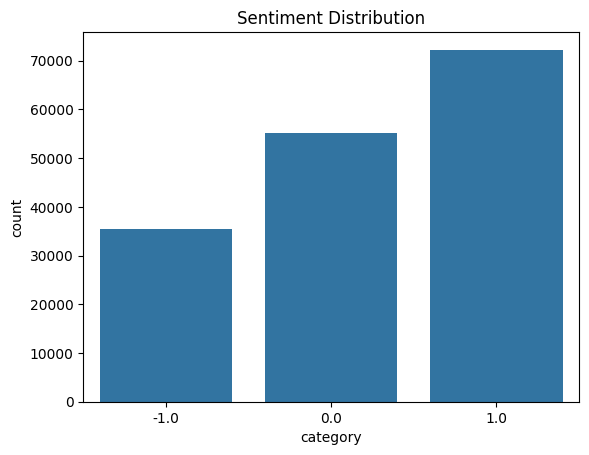

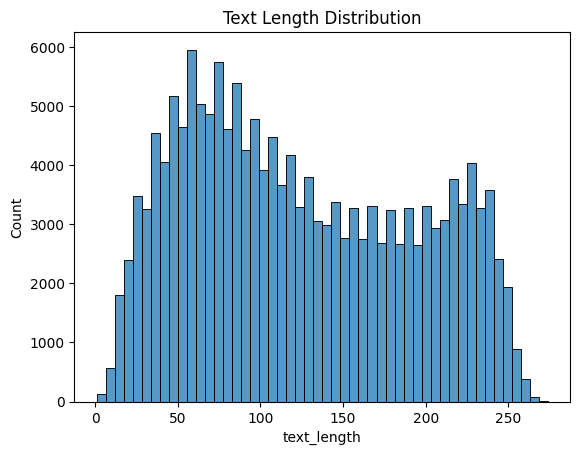

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='category', data=df)
plt.title('Sentiment Distribution')
plt.show()

df['text_length'] = df['clean_text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.show()

In [8]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill or drop missing values in 'clean_text' column
df['clean_text'].fillna('', inplace=True)  # Replace NaN with empty strings
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Naive Bayes Precision:", precision_score(y_test, nb_pred, average = 'micro'))
print("Naive Bayes F1 Score:", f1_score(y_test, nb_pred, average = 'micro'))
print("Naive Bayes Recall Score:", recall_score(y_test, nb_pred, average = 'micro'))

Naive Bayes Accuracy: 0.7373442964962876
Naive Bayes Precision: 0.7373442964962876
Naive Bayes F1 Score: 0.7373442964962876
Naive Bayes Recall Score: 0.7373442964962876


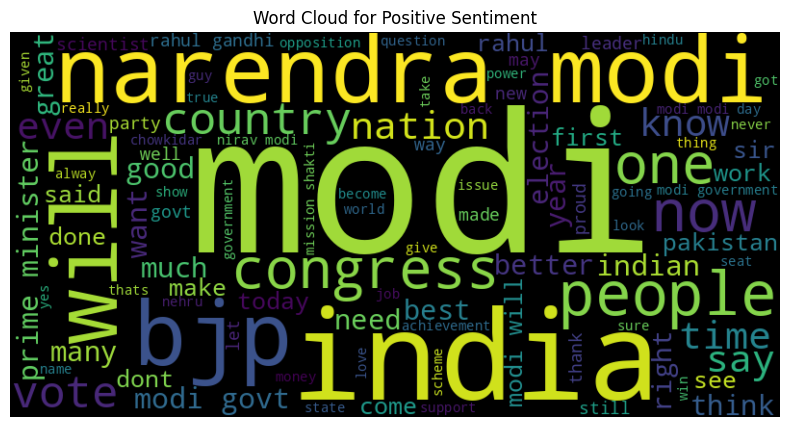

NameError: name 'X' is not defined

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your data into a DataFrame
df = pd.read_csv('/content/archive (8) (1).zip')

# Convert all entries in 'clean_text' to strings and remove NaN values
positive_text = ' '.join(df[df['category'] == 1]['clean_text'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming X and y are defined from previous cells
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model and get predictions
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)  # Calculate nb_pred here

conf_matrix = confusion_matrix(y_test, nb_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM') # Consider changing title to 'Confusion Matrix for Naive Bayes'
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


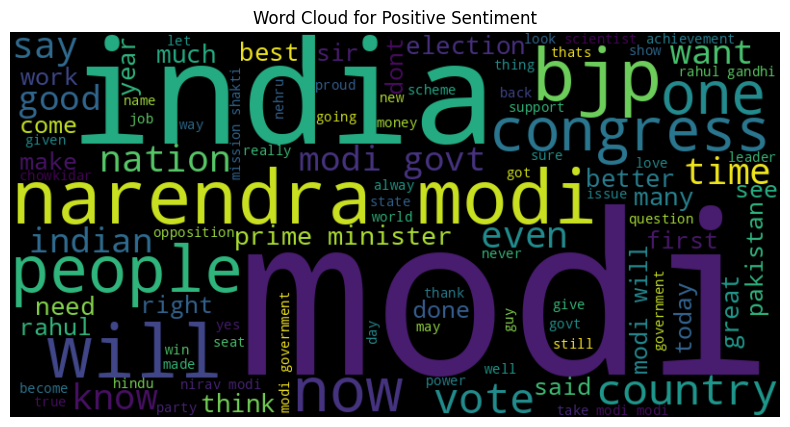

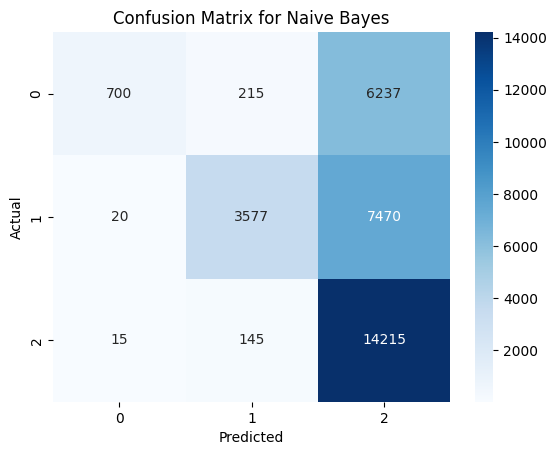

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load your data into a DataFrame
df = pd.read_csv('/content/archive (8) (1).zip')

# Convert all entries in 'clean_text' to strings and remove NaN values
positive_text = ' '.join(df[df['category'] == 1]['clean_text'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()
df.dropna(subset=['category'], inplace=True)  # Drop rows with NaN in 'category'
# Assuming 'clean_text' as feature and 'category' as label
X = df['clean_text'].dropna().astype(str)  # Features (text data)
y = df.loc[X.index, 'category']   # Labels

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model and get predictions
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
